```
Angelo Galavotti
angelo.galavotti@studio.unibo.it
```
__At the end of this document, I've left some questions for the professor regarding the ways in which I could improve the solution__.  

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

df = pd.read_csv('exam_data.csv')
df.head()

,A0,A1,A2,y
0,2067.582042,-15.259519,0.020472,2
1,1319.589579,-18.412320,0.521308,0
2,1170.212183,-19.470602,0.814986,0
3,1424.162191,9.867841,0.848751,1
4,1551.069098,11.809364,0.884964,1


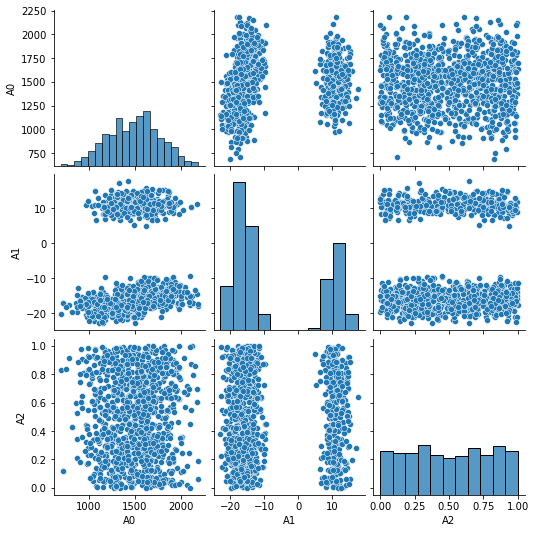

In [52]:
X = df.drop(['y'], axis=1)
y = df['y']

sns.pairplot(X)

By looking at features A1 w.r.t A0 and A2, we can see that there are 2 possible clusters. We could say that A1 is two most interesting column. 

In [53]:
k_range = list(range(2,11))

result = []
for k_ in k_range : 
    estimator = KMeans(n_clusters=k_)
    y_pred = estimator.fit_predict(X)
    result.append([k_, silhouette_score(X, y_pred), estimator.inertia_])

result = pd.DataFrame(data=result, columns=["n_clusters", "silhouette_score", "inertia"])
result.sort_values(by='silhouette_score', ascending=False)

,n_clusters,silhouette_score,inertia
0,2,0.568303,2.519314e+07
2,4,0.540522,7.425540e+06
1,3,0.534310,1.307941e+07
5,7,0.516322,2.865171e+06
3,5,0.513409,5.276044e+06
6,8,0.510329,2.246067e+06
7,9,0.506179,1.892116e+06
8,10,0.499188,1.550146e+06
4,6,0.493763,3.988032e+06


By looking at the silhoutte score, we can see that using 2 clusters is the best choice.

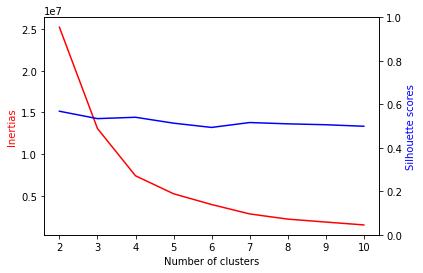

In [54]:
fig, ax = plt.subplots()
ax.plot(result['n_clusters'], result['inertia'], color='red')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertias', color='red')

ax2 = ax.twinx()
ax2.plot(result['n_clusters'], result['silhouette_score'], color='blue')
ax2.set_ylabel('Silhouette scores', color='blue')
ax2.set_ylim(0, 1)

plt.show()

Using the elbow method, we could see that the best number of cluster is either 3 or 4. The changes in silhoutte score are not so evident, so it can't be used as a way to determine the number of clusters. 

In [55]:
K = 3
estimator = KMeans(n_clusters=K)
y_km = estimator.fit_predict(X)
s_score = silhouette_score(X, y_km)

print("The silhoutte score of K = {} using KMeans is {:.3f}".format(K, s_score))

The silhoutte score of K = 3 using KMeans is 0.537


In [56]:
from sklearn.metrics.cluster import pair_confusion_matrix

pcm = pair_confusion_matrix(y, y_km)
print(pcm / pcm.sum())
print("Accuracy wrt to gold standard is {:.2f}%".format((pcm / pcm.sum()).diagonal().sum()*100))

[[0.47666867 0.19066466]
 [0.17105305 0.16161361]]
Accuracy wrt to gold standard is 63.83%


Regarding data transformation, we could try to use MinMax scaling to improve our scores. 

In [57]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
X_scaled = pd.DataFrame(minmax.fit_transform(X), columns=["A0", "A1", "A2"])

# Re-do the fitting and evaluate the new clustering scheme
estimator = KMeans(n_clusters=K)
y_km = estimator.fit_predict(X_scaled)

pcm = pair_confusion_matrix(y, y_km)
print(pcm / pcm.sum())

print("Accuracy wrt to gold standard is {:.2f}%".format((pcm / pcm.sum()).diagonal().sum()*100))

[[0.55601802 0.11131532]
 [0.11117117 0.2214955 ]]
Accuracy wrt to gold standard is 77.75%


Questions regarding the correction:
- are the comments enough? If not, what else should I specify (especially when asked to describe what I am seeing plots)?
- is the hyperparameter tuning for KMeans enough?
    - should I have used another model, such as Agglomerative Clustering, which allows for more tuning?
- is the name of the variable explicative enough?
- is the usage of the `print()` function important?
- what other data transformation methods could I have used, and from what would I have deduced it?